In [41]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

import psutil
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Class 0", "Class 1"]

In [42]:
df = pd.read_csv('spneodeath_clean (1).csv')
df.describe()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
count,410091.000000,410091.000000,410091.000000,410091.000000,410091.000000,410091.000000,410091.000000,410091.000000,410091.000000,410091.000000,...,410091.000000,410091.000000,410090.000000,410090.000000,410090.000000,410090.000000,410090.00000,410090.000000,410090.000000,410090.000000
mean,1.012000,28.228896,2.089170,4.215518,0.831484,0.238296,4.880224,1.029703,1.567647,3.723878,...,2.265673,1.061043,0.527957,0.320761,38.337923,1.046714,1.20862,3.904562,3.952459,0.006174
std,0.152218,6.684056,1.374595,0.629960,1.110759,0.569327,0.430080,0.175433,0.495403,0.578561,...,1.431755,1.308200,1.029236,0.634876,2.102528,0.220751,0.42499,1.445382,2.613775,0.078334
min,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.00000,1.000000,1.000000,0.000000
25%,1.000000,23.000000,1.000000,4.000000,0.000000,0.000000,5.000000,1.000000,1.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,38.000000,1.000000,1.00000,2.000000,2.000000,0.000000
50%,1.000000,28.000000,2.000000,4.000000,1.000000,0.000000,5.000000,1.000000,2.000000,4.000000,...,1.000000,1.000000,0.000000,0.000000,39.000000,1.000000,1.00000,5.000000,3.000000,0.000000
75%,1.000000,33.000000,2.000000,5.000000,1.000000,0.000000,5.000000,1.000000,2.000000,4.000000,...,4.000000,2.000000,1.000000,1.000000,40.000000,1.000000,1.00000,5.000000,5.000000,0.000000
max,4.000000,58.000000,5.000000,9.000000,14.000000,18.000000,6.000000,3.000000,2.000000,4.000000,...,5.000000,38.000000,37.000000,40.000000,45.000000,3.000000,4.00000,5.000000,11.000000,1.000000


In [3]:
df.head()


,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
0,1,32,2.0,4.0,1,0,5.0,1.0,2.0,4,...,1.0,1,0.0,1.0,39.0,1.0,1.0,5.0,5.0,0.0
1,1,40,1.0,3.0,4,1,5.0,1.0,2.0,4,...,4.0,5,4.0,0.0,40.0,2.0,1.0,5.0,7.0,0.0
2,1,31,2.0,5.0,1,0,5.0,1.0,2.0,4,...,1.0,1,0.0,1.0,39.0,1.0,1.0,2.0,5.0,0.0
3,1,19,5.0,4.0,2,0,5.0,1.0,1.0,4,...,4.0,2,2.0,0.0,39.0,1.0,1.0,5.0,4.0,0.0
4,1,33,1.0,4.0,5,0,5.0,1.0,1.0,2,...,2.0,5,5.0,0.0,40.0,1.0,2.0,2.0,3.0,0.0


In [43]:
df1 = df.dropna()

In [44]:
df1.isna().sum()

tp_birth_place                 0
maternal_age                   0
tp_marital_status              0
tp_maternal_education_years    0
num_live_births                0
num_fetal_losses               0
tp_pregnancy_duration          0
tp_pregnancy                   0
tp_labor                       0
tp_prenatal_appointments       0
cd_apgar1                      0
cd_apgar5                      0
newborn_weight                 0
has_congenital_malformation    0
tp_maternal_skin_color         0
num_gestations                 0
num_normal_labors              0
num_cesarean_labors            0
num_gestational_weeks          0
tp_presentation_newborn        0
tp_childbirth_assistance       0
tp_fill_form_responsible       0
cd_robson_group                0
neonatal_death                 0
dtype: int64

Class 0: 407558
Class 1: 2532
Proportion: 160.96 : 1


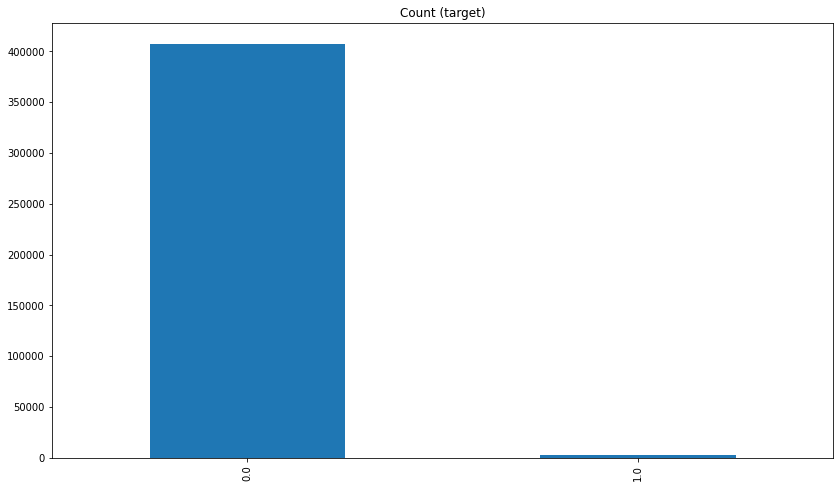

In [45]:
target_count = df1.neonatal_death.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [48]:
#Create independent and Dependent Features
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["neonatal_death"]]
# Store the variable we are predicting 
target = "neonatal_death"
# Define a random state 
state = np.random.RandomState(42)
X = df1[columns]
y = df1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)


(410090, 23)
(410090,)


In [49]:
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,y)

X_res.shape,y_res.shape

((5064, 23), (5064,))

In [50]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0.0: 407558, 1.0: 2532})
Resampled dataset shape Counter({0.0: 2532, 1.0: 2532})


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=3)


In [52]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=3)


In [53]:
# from pandas.core.common import random_state
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7, eval_metric='mlogloss')
    classifier.fit(X_train1, y_train1)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))

classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(X_train,y_train)

XGBClassifier(max_depth=12, n_estimators=10, subsample=0.7)

In [55]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))


[[956  85]
 [ 62 923]]
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1041
         1.0       0.92      0.94      0.93       985

    accuracy                           0.93      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.93      0.93      0.93      2026



In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=45)


In [86]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=45)


In [87]:
# from pandas.core.common import random_state
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7, eval_metric='mlogloss')
    classifier.fit(X_train1, y_train1)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))

classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(X_train,y_train)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[698  65]
 [ 50 707]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       763
         1.0       0.92      0.93      0.92       757

    accuracy                           0.92      1520
   macro avg       0.92      0.92      0.92      1520
weighted avg       0.92      0.92      0.92      1520



In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=45)


In [115]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=45)



In [116]:
# from pandas.core.common import random_state
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[942  77]
 [250 757]]
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      1019
         1.0       0.91      0.75      0.82      1007

    accuracy                           0.84      2026
   macro avg       0.85      0.84      0.84      2026
weighted avg       0.85      0.84      0.84      2026



In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=45)

In [143]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=45)

In [144]:
# from pandas.core.common import random_state
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[708  55]
 [194 563]]
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       763
         1.0       0.91      0.74      0.82       757

    accuracy                           0.84      1520
   macro avg       0.85      0.84      0.83      1520
weighted avg       0.85      0.84      0.83      1520



In [121]:
15

In [26]:
5/from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=3)


In [27]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=3)



In [28]:
# from pandas.core.common import random_state
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
# from sklearn.linear_model import LogisticRegression
# clf= LogisticRegression(random_state=0,solver='lbfgs', max_iter=888517)
# clf.fit(X_train, y_train)
# y_pred= clf.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[985  56]
 [146 839]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1041
         1.0       0.94      0.85      0.89       985

    accuracy                           0.90      2026
   macro avg       0.90      0.90      0.90      2026
weighted avg       0.90      0.90      0.90      2026



In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=3)

In [32]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=3)

In [33]:
# from pandas.core.common import random_state
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
# from sklearn.linear_model import LogisticRegression
# clf= LogisticRegression(random_state=0,solver='lbfgs', max_iter=888517)
# clf.fit(X_train, y_train)
# y_pred= clf.predict(X_test)

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))


[[723  44]
 [100 653]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       767
         1.0       0.94      0.87      0.90       753

    accuracy                           0.91      1520
   macro avg       0.91      0.90      0.91      1520
weighted avg       0.91      0.91      0.91      1520



In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=5)


In [176]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)



In [177]:
from pandas.core.common import random_state
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(random_state=0,solver='lbfgs', max_iter=888517)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[913  99]
 [104 910]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      1012
         1.0       0.90      0.90      0.90      1014

    accuracy                           0.90      2026
   macro avg       0.90      0.90      0.90      2026
weighted avg       0.90      0.90      0.90      2026



In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=50)

In [203]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=50)
                                                    

In [234]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7, eval_metric='mlogloss')
    classifier.fit(X_train1, y_train1)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[697  51]
 [ 33 739]]
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       748
         1.0       0.94      0.96      0.95       772

    accuracy                           0.94      1520
   macro avg       0.95      0.94      0.94      1520
weighted avg       0.94      0.94      0.94      1520



In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=50)

In [259]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=50)
                                                    

In [260]:

from sklearn.ensemble import RandomForestClassifier 
Classifier = RandomForestClassifier(n_estimators=20, random_state=0)
Classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[676  50]
 [ 63 731]]
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       726
         1.0       0.94      0.92      0.93       794

    accuracy                           0.93      1520
   macro avg       0.93      0.93      0.93      1520
weighted avg       0.93      0.93      0.93      1520

